# Model Creation and Prediction
In this chapter, I will create a model and prediction

In [1]:
#Read the data
import pandas as pd

df = pd.read_csv("politifact_clean_binarized_tokenized.csv")
df.head(5)

,statement,source,link,veracity,tokens
0,"""Watch those GDP numbers. We started off at a ...",Donald Trump,/web/20180705082623/https://www.politifact.com...,0,"['Watch', 'those', 'GDP', 'numbers', 'We', 'st..."
1,"""The European Union … they send us Mercedes, t...",Donald Trump,/web/20180705082623/https://www.politifact.com...,0,"['The', 'European', 'Union', 'they', 'send', '..."
2,"""Clinton campaign official arrested by FBI on ...",Bloggers,/web/20180705082623/https://www.politifact.com...,0,"['Clinton', 'campaign', 'official', 'arrested'..."
3,"""Our courts find that 80 percent of those who ...",Jeff Sessions,/web/20180705082623/https://www.politifact.com...,0,"['Our', 'courts', 'find', 'that', '80', 'perce..."
4,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,/web/20180705082623/https://www.politifact.com...,0,"['Says', 'a', 'progressive', 'income', 'tax', ..."


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Embedding function
def CntVectorizer(data):
    count_vect = CountVectorizer()
    emb = count_vect.fit_transform(data)

    return emb, count_vect

# Save data as list, use only statement data and label data
list_statement = df.statement.tolist()
list_label = df.veracity.tolist()

# Create a Train data and Test data
X_train, X_test, y_train, y_test = train_test_split(list_statement, list_label, test_size=0.2, random_state=40)

X_train_count, count_vectorizer = CntVectorizer(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train[1:5]

['A report by the health insurance industry "ignores some of the key policies that are part of the Senate Finance Committee bill."',
 '"Mitt Romney received exactly zero votes in at least 12 Cuyahoga County precincts."',
 'Says Texas has the 15th largest economy in the world.',
 '"Police officers in this state have that right," to check the immigration status of people they arrest.']

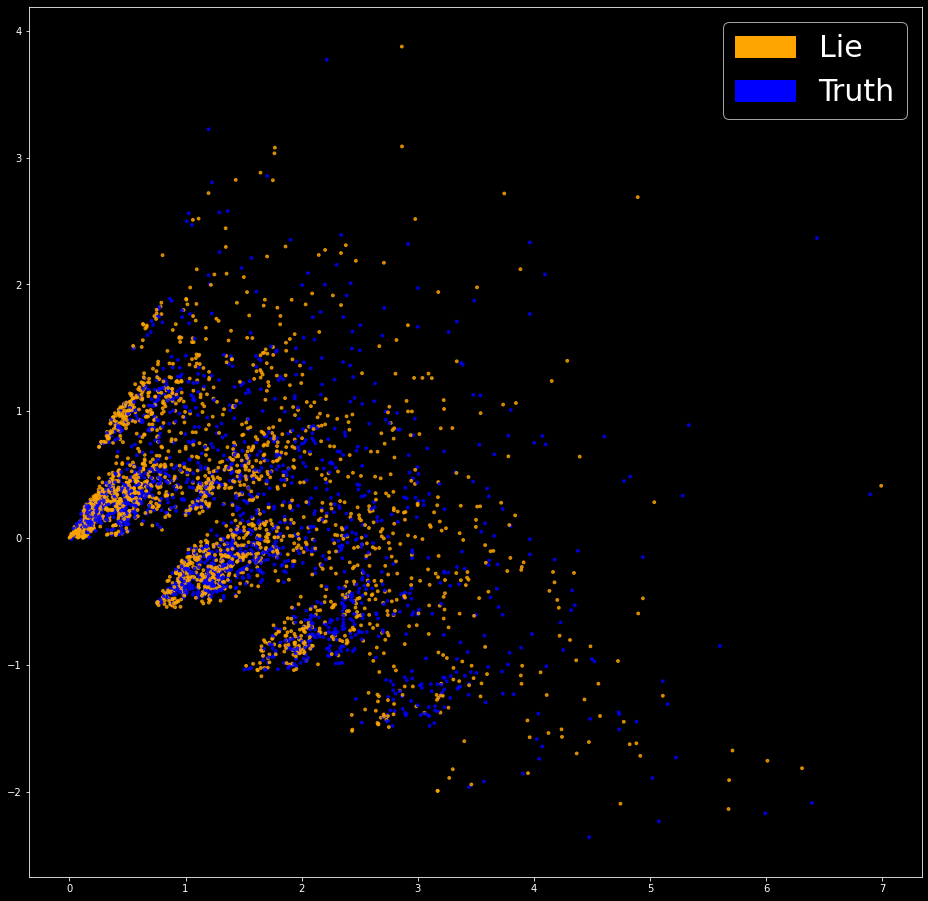

In [3]:
# Visualize embedded data

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['orange', 'blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color='orange', label='Lie')
        green_patch = mpatches.Patch(color='blue', label='Truth')
        plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_count, y_train)
plt.show()

In [10]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_count, y_train)

y_predicted_count = clf.predict(X_test_count)

In [5]:
# Evaluate Logistic regression result

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrcis(y_test, y_predicted):
    # Precision = TP / (TP + FP)
    precision = precision_score(y_test, y_predicted, pos_label=None, average='weighted')

    # Recall = TP / (TP + FN)
    recall = recall_score(y_test, y_predicted, pos_label=None, average='weighted')

    # Harmonic mean of precision and recall ?
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    # Accuracy = (TP + TN) / Total
    accuracy = accuracy_score(y_test, y_predicted)
    
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrcis(y_test, y_predicted_count)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.591, precision = 0.589, recall = 0.591, f1 = 0.589
